# Smart Distribution Systems (B-KUL-H00P3A) - Exercise session 1
Prof. Geert Deconinck

This exercise session will familiarize the students with basic concepts of machine learning by giving them a first introduction to the most used libraries in data science.

The students will learn to:
* set up a machine learning environment, using state-of-the-art tools, such as keras, tensorflow and theano in Python;
* implement and train a two-layer neural network using Keras;
* perform the initial data exploration steps of a real-life forecasting problem in power systems.

First, we need to import the libraries necessary during this exercise session.
* Pandas is a library providing intuitive data structures for data analysis of labeled data, you can think about these structures (DataFrames) as tables. You can find the documentation here: http://pandas.pydata.org/pandas-docs/stable/.
* Numpy is the fundamental package for scientific computing in Python. Simply put, Numpy provide MatLab-like functionality to Python. Numpy-documentation: 
https://numpy.org/doc/1.22/.
* Matplotlib provides a MatLab-like plotting interface to python. Docs: https://matplotlib.org/api/pyplot_api.html.

In [2]:
import pandas as pd
import numpy as np
#%matplotlib ipympl
import matplotlib.pyplot as plt

The 'seed' of the numpy random generators determines which '(pseudo-)random-numbers' are being generated. <br>
To have the same results between runs and between groups, we set the seed of the random generator. More info: https://stackoverflow.com/questions/21494489/what-does-numpy-random-seed0-do.

In [3]:
np.random.seed(seed=1)

## 1 Linear (ridge) regression

To get familiar with the basic syntax of Python and the different libraries used in this exercise session, first a really simple linear regression problem is solved. 

We start by generating a simple dataset. <br>
The dataset consists of (x,y) pairs. The x-values are random numbers between 0 and 100. The y-values are constructed by adding a small random number (drawn from N(0,3)) to the x-value. As a result, if we would like to predict the y-value for an unknown x-value, the best guess would be to simply predict x. <br>
Info on the different numpy-functions used: https://numpy.org/doc/stable/reference/random/index.html?highlight=random#module-numpy.random.

In [4]:
a = 0
b = 100
x = np.random.random_sample(size=(50, 1)) # draw 50 random numbers from [0,1.0) return them as vector with the shape (50, 1)
x = (b-a) * x + a # rescale to the interval [0, 100)
mean = 0
sigma = 3
r =  sigma * np.random.randn(50, 1) + mean # draw a number form N(0,1) and scale it to N(mean,sigma)
y = x + r # add the vector of 50 random numbers to the vector of x-values to get the y-values

Using matplotlib, we can easily plot these points on a scatter plot.

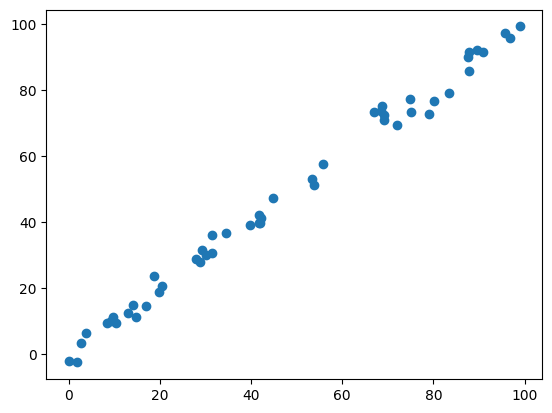

In [5]:
plt.figure()
plt.scatter(x, y)
plt.show()

By means of illustration, we can now train a linear regression model to approximate the funcion y=f(x). <br>
We will use ridge-regression. Therefore, we import 'linear_model' from scikit learn. Scikit-learn is a Python library build on Numpy and offers easy-to-use machine learning functions. <br>
The documentation of scikit-learn is found here: http://scikit-learn.org/stable/. <br>
And the documentation of linear_model.Ridge(): http://scikit-learn.org/stable/modules/linear_model.html#ridge-regression.

In [6]:
from sklearn import linear_model
model = linear_model.Ridge(alpha=0.5)
model.fit(x, y) # the input-matrix should have the shape [n_samples, n_features]. Thus, in this case [50, 1].

Ridge(alpha=0.5)

We have now fitted our regression model called, using our generated samples. To see if our model approximates the function y=x, we can generate a new set of x-values and use the model to predict the y-values. <br>
In the next cell, generate a vector called x_val (validation set) containing 20 random numbers in [0, 100].

In [7]:
x_val = np.random.random_sample(size=(20, 1)) # draw 20 random numbers from [0,1.0) return them as vector with the shape (20, 1)
x_val = (b-a) * x_val + a # rescale to the interval [0, 100)

We can use our linear model to predict the y-values of x_val and again make a scatter plot. The y-values should be on the line y=x.

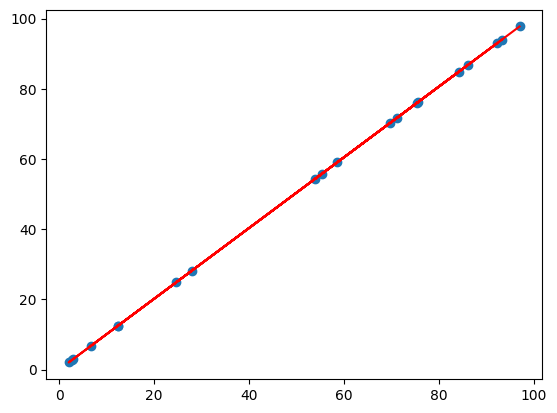

In [8]:
y_val = model.predict(x_val)
plt.figure()
plt.scatter(x_val, y_val)
plt.plot(x_val, y_val, color='red')
plt.show()

In the previous regression problem, there was clear linear relation between the inputs (x-values) and the targets (y-values). This is obviously not always the case. To illustrate this point we will now to try to apprximate a sine-function with the same ridge regression method. <br>
In the next cell, generate a vector (call it x_train) with shape (500,1) containing 500 random numbers in the interval [0, 2*Pi). Calculate the sine of all elements in this vector and call this y_train. <br>
Hint: check the numpy documentation for sin(x).

In [9]:
b_new = 2*np.pi
x_train = np.random.random_sample(size=(500, 1)) # draw 500 random numbers from [0,1.0) return them as vector with the shape (500, 1)
x_train = (b_new-a) * x_train + a # rescale to the interval [0, 2*pi)
y_train = np.sin(x_train)

We plot this training set together with the actual sine-function.

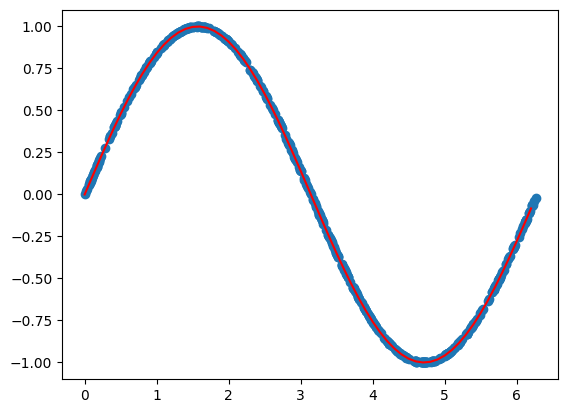

In [10]:
# generate values to plot the actual sine-function
x_sin = np.arange(0, 2*np.pi, 0.1) # a list containing all the numbers in [0, 2*pi] with a step of 0.1
y_sin = np.sin(x_sin) # the sine of all these numbers
# plot the sine-function as well as a scatter plot of the training set
plt.figure()
plt.scatter(x_train, y_train)
plt.plot(x_sin, y_sin, color='red')
plt.show()

Now that we have again a vector of inputs and targets for our linear model, we can fit it to approximate the sine function.

In [11]:
model = linear_model.Ridge(alpha = .5)
model.fit(x_train, y_train)

Ridge(alpha=0.5)

In most machine learning problems we would like to have three data-sets: training-set, validation-set and test-set. Each set has its own functionality in the process. Make sure you understand the purpose of these sets. https://stats.stackexchange.com/questions/19048/what-is-the-difference-between-test-set-and-validation-set is good starting point. <br>
Simply put, we use the training set to train our model. The validation set is not used to train the model but to evaluate the performance of a trained model. Based on this evaluation, the model architecture might be changed. Since, after tuning of the architecture, the performance on the validation set is thus probably too optimistic (why?), we use a final test-set to get an accurate estimate of the model's performance.

Generate a new vector of x-values (between 0 and 2*Pi). Generate more or less 50 test-set values. Calculate both their true values and their predictions. Draw one scatter plot including both the targets and the predictions, in red and blue respectively. <br>
Call the x-values: 'x_test'. The true y-values and the prediction: 'y_test' and 'y_pred', respectively.

In [12]:
x_test = np.random.random_sample(size=(50, 1)) # draw 50 random numbers from [0,1.0) return them as vector with the shape (50, 1)
x_test = (b_new-a) * x_test + a # rescale to the interval [0, 100)
y_test = np.sin(x_test)

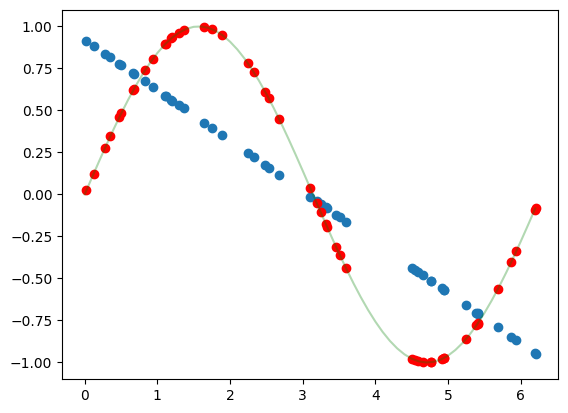

In [13]:
y_pred = model.predict(x_test)
plt.figure()
plt.scatter(x_test, y_pred)
plt.scatter(x_test, y_test, color='red')
plt.plot(x_sin, y_sin, color='green', alpha=0.3)
plt.show()

Why are the predictions not representing the sine-function?

It is clear that we need other regression techniques to be able to approximate a broader range of functions.

## 2 Non-linear regression

Since in a lot of real-life problems it is required to approximate a non-linear function, we need methods to do this.

### 2.1 Kernel ridge-regression

Different techniques exist. We will first extend linear ridge-regression to a non-linear variant, using the so-called 'kernel-trick' (https://towardsdatascience.com/understanding-the-kernel-trick-e0bc6112ef78). Here, it suffices to know the basic philosophy behind kernel functions. With a kernel function we transform the input-space to a higher dimensional space. In this space, our non-linear function might be linear and we solve a linear regression problem. Afterwards, we transform our solution back to the original space. Simply put, we are thus able to approximate a non-linear function in our input-space by approximating a linear-function in a higher dimensional space. <br>
In the next piece of code we will use the same inputs and targets (of the sine-function) but now perform ridge regression with a radial basis kernel-function (rbf). More info about radial basis functions can be found here: https://en.wikipedia.org/wiki/Radial_basis_function. <br>
Thereafter, we use the same x_test and y_test you generated during the linear ridge regression to estimate y_pred. We plot both the linear regression solution, and new solution.£

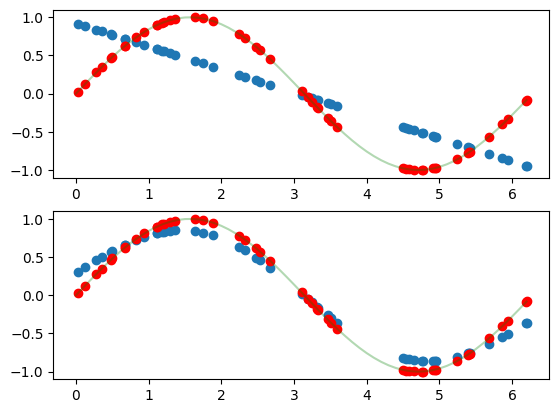

In [14]:
from sklearn import kernel_ridge
model = kernel_ridge.KernelRidge(alpha=3.5, kernel='rbf', gamma=0.1)
model.fit(x_train, y_train)
y_pred_kernel = model.predict(x_test)
plt.figure()
plt.subplot(211)
plt.scatter(x_test, y_pred) # the predictions made using ridge regression
plt.scatter(x_test, y_test, color='red') # the ground truth
plt.plot(x_sin, y_sin, color='green', alpha=0.3) # the sine-function, per reference
plt.subplot(212)
plt.scatter(x_test, y_pred_kernel) # the predictions made by kernel ridge regression
plt.scatter(x_test, y_test, color='red')
plt.plot(x_sin, y_sin, color='green', alpha=0.3)
plt.show()

How do the results compare?

### 2.2 Neural networks

Nowadays, neural networks (NNs) are highly used for regression purposes. Neural networks have already been explained in the introduction slides. In this exercise session we will be using Keras, a high level neural network API in Python. Keras can use different backends, here we use the 'tensorflow' backend. Keras makes dealing with NNs *easy*. You can find the Keras documentation here: https://keras.io/.

In [15]:
##### %tensorflow_version 1.x

In [1]:
from keras import backend as K
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop, SGD

Make sure to read the Keras docs dealing with the Sequential model (https://keras.io/getting-started/sequential-model-guide/). The sequential model is the most fundamental part of Keras and allows to sequentially connect different layers of a NN. Thereafter, this model can be compiled and trained. All these low-level functionalities have been implemented in Keras. Next, we create a sequential model and add one hidden layer and one output layer. We use a 'sigmoid' activation function for the hidden layer, and a linear activation function for the output layer. In order to have a non-linear regression model, we need at least one non-linear activation function. Since our model only requires one output, our output layer consists of one neuron. We, arbitrarly, decide to have 12 hidden neurons. Furthermore, we are going to use the RMSprop optimizer and a mean squared error. <br>
The amount of hidden neurons and the activation function can greatly affect the performance of our model. For now, this model suffices, but make sure to experiment with different NN architectures once you try to solve a more complex regression problem. <br>
* More info on activation functions: https://en.wikipedia.org/wiki/Activation_function, https://keras.io/activations/ <br>
* Good practices with regards to NN architecture: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw <br>
* More info on why we need a optimizer and the different optimizers available: https://towardsdatascience.com/types-of-optimization-algorithms-used-in-neural-networks-and-ways-to-optimize-gradient-95ae5d39529f, https://keras.io/optimizers/

In [17]:
neurons = [12, 1]
activation_functions = ['sigmoid', 'linear','softplus']

model = Sequential()
model.add(Dense(neurons[0], input_dim=1, activation=activation_functions[0], kernel_initializer='random_uniform'))
model.add(Dense(neurons[1], activation=activation_functions[1], kernel_initializer='random_uniform'))
    
rprop = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-6)
model.compile(loss='mean_squared_error', optimizer=rprop)

C:\Users\cmene\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


We can now fit this model to our earlier defined training set (x_train, y_train). <br> 
Running the next piece of code, can take a while (wait until the MSE is printed)

In [18]:
output_training = model.fit(x_train, y_train, epochs=700, batch_size=6, verbose=0) # train the model
mse = output_training.history['loss'][-1] # from the 'history' of the error during training, take the last element (-1)
print('- mse is %.4f' % mse + ' @ ' + str(len(output_training.history['loss']))) # print the final MSE and at which episode it occured

Again, we can plot the predictions and the actual y_test values.

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


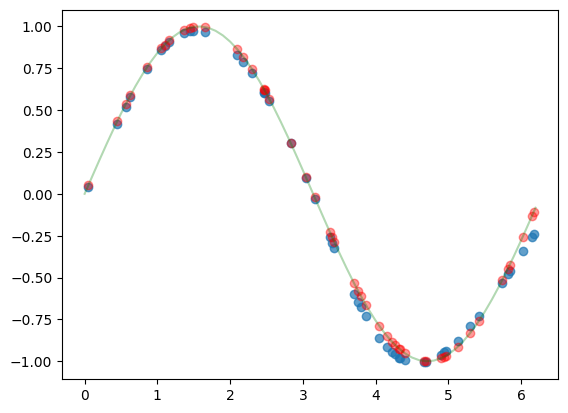

In [ ]:
# predict the test set y-values
y_pred = model.predict(x_test)
plt.figure()
plt.scatter(x_test, y_pred, alpha=0.7) # plot the y-values predicted by the NN
plt.scatter(x_test, y_test, color='red', alpha=0.4) # plot the actual y-values, a bit transparant
plt.plot(x_sin, y_sin, color='green', alpha=0.3) # plot the sine-function
plt.show()

This plot gives a pretty good idea about the performance of the NN. <br>
Feel free to experiment with different NN architectures, optimization algorithms and activation functions, by re-running the past 3 cells. <br>
A clear performance measure can give a better indication than a graph. Implement the mean_squared_error function in the next cell. This function should return the mean squared error between the vectors x and y. You can assume the vector have the shape (n_samples, n_features). <br>
Check the numpy docs!

In [ ]:
"""def mean_squared_error(x,y):
    i = 0
    sum_err = 0
    for i in range(len(x)):
        err = np.square(x[i]-y[i])
        sum_err += err
    return sum_err/len(x)"""
# more compact
def mean_squared_error(x,y):
    return np.mean(np.square(x-y))

Use this function to calculate the MSE between y_test and y_pred. <br>
Print it, and check wether it deviates from the error on the training set (printed after training). Why?

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(mse)

0.0019771756645448803


Of course, in real life, datapoints will almost never exactly match the underlying function, and there will always be a bit of noise in the measurements, e.g. due to noise of a sensor. <br>
Lets make it a bit more challenging for the NN and add noise to the y_train values. By doing this the tuples (x,y) won't exactly match the sine-function anymore. We can show this by plotting the sine and the training set. <br>
You can play with the value of the standard deviation (sigma) and see the result on the accuracy of the prediction (of the test-set).

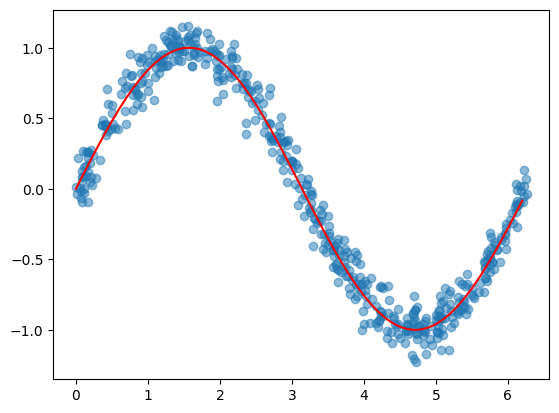

In [ ]:
sigma = 0.1
y_train_noise = y_train + sigma * np.random.randn(y_train.shape[0], y_train.shape[1])
plt.figure()
plt.plot(x_sin, y_sin, color='red')
plt.scatter(x_train, y_train_noise, alpha=0.5)
plt.show()

To have a fair comparison we need to re-initialize the weights of the model. Otherwise the results will be too optimistic since the NN is already trained on a sine-function. Also, RMSprop keeps an internal state because it has some variables that change based on the training progess. Therefore, we'll recompile the model as well.

In [ ]:
def reset_weights(model):
    model.set_weights([keras.initializers.RandomNormal(mean=0.0, stddev=0.05)(model.get_weights()[i].shape) for i in range(len(model.get_weights()))])


In [ ]:
reset_weights(model)
model.compile(loss='mean_squared_error', optimizer=rprop)

In the next cell, fit the NN to the new (!) training set and calculate the MSE on the test set. Again plot the test set ground truth and predictions. Add the actual sine as a reference.

- mse is 0.0142 @ 700
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/stepWARNING:tensorflow:6 out of the last 22 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001D743E2B920> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


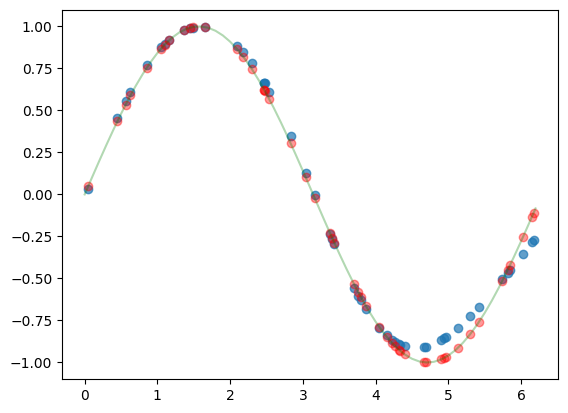

0.003479681865440411


In [ ]:
output_training = model.fit(x_train, y_train_noise, epochs=700, batch_size=6, verbose=0) # train the model
mse = output_training.history['loss'][-1] # from the 'history' of the error during training, take the last element (-1)
print('- mse is %.4f' % mse + ' @ ' + str(len(output_training.history['loss']))) # print the final MSE and at which episode it occured

y_pred = model.predict(x_test)
plt.figure()
plt.scatter(x_test, y_pred, alpha=0.7) # plot the y-values predicted by the NN
plt.scatter(x_test, y_test, color='red', alpha=0.4) # plot the actual y-values, a bit transparant
plt.plot(x_sin, y_sin, color='green', alpha=0.3) # plot the sine-function
plt.show()
mse = mean_squared_error(y_test, y_pred)
print(mse)

What do you think, is the NN handling the noise well?

Neural networks have been know to perform supervised learning (https://en.wikipedia.org/wiki/Supervised_learning) pretty well, as long as they have enough examples. <br>
Next, select 10 of the points from the training set (x_train, y_train_noise). Make sure to select tuples, and not x and y independently. Run the previous cell again, with this new (smaller) training set. <br>
Is the result as good/bad as you expected?

In [ ]:
c = ((x_train), (y_train_noise))
idx = np.random.choice(len(c),10)
idx1 = np.array(c)[idx.astype(int)]

- mse is 0.0109 @ 700
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


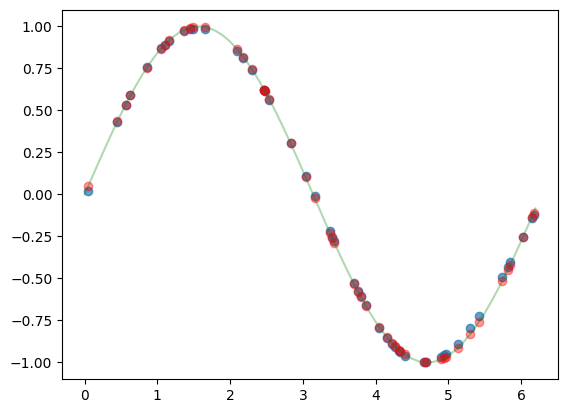

0.00015812735347938862


In [ ]:
output_training = model.fit(idx1[0], idx1[1], epochs=700, batch_size=6, verbose=0) # train the model
mse = output_training.history['loss'][-1] # from the 'history' of the error during training, take the last element (-1)
print('- mse is %.4f' % mse + ' @ ' + str(len(output_training.history['loss']))) # print the final MSE and at which episode it occured

y_pred = model.predict(x_test)
plt.figure()
plt.scatter(x_test, y_pred, alpha=0.7) # plot the y-values predicted by the NN
plt.scatter(x_test, y_test, color='red', alpha=0.4) # plot the actual y-values, a bit transparant
plt.plot(x_sin, y_sin, color='green', alpha=0.3) # plot the sine-function
plt.show()
mse = mean_squared_error(y_test, y_pred)
print(mse)

One of the problems of Neural Networks (actually, regression in general) is the problem of overfitting. Especially when there aren't many training samples available, it is possible to 'specialize' the NN too much to these available samples. The predictions will then correspond too closely to these samples and won't generalize as good anymore to unseen samples. <br>
More info on overfitting here: https://datascience.stackexchange.com/questions/61/why-is-overfitting-bad-in-machine-learning. <br>
An important principle to take into account when deciding an architecture of a NN is Occams Razor (https://en.wikipedia.org/wiki/Occam%27s_razor). This principles states that (not only with NNs) one should select a model with the fewest assumptions. In the case of NN, this means the 'simplest' architecture. <br>
In what follows we will expereimentaly show the problem of overfitting, based on the running sine-function example.

First we will create a new training-, validation- and test-set. We will add a bit of noise to the training set.

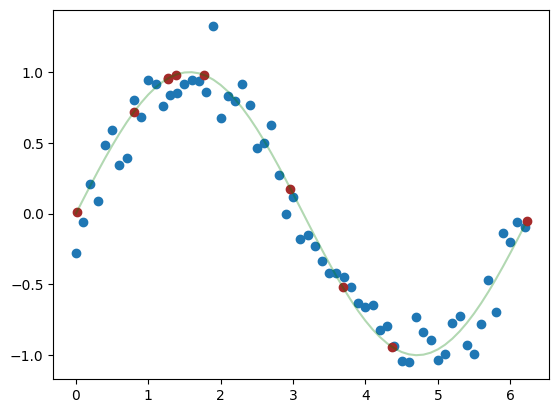

In [ ]:
np.random.seed(seed=54) # set a new seed, such that the results of everybody are similar
sigma = 0.15
train_size = 30 
val_size = 10
x_train = np.arange(0, 2*np.pi, 0.1).reshape(-1, 1)
y_train = np.sin(x_train) + sigma * np.random.randn(x_train.shape[0], 1)
x_val = 2*np.pi * np.random.random_sample((val_size, 1))
y_val = np.sin(x_val)
# x_test = 2*np.pi * np.random.random_sample((1, 70)).reshape((-1, 1))
# y_test = np.sin(x_test)
x_test = x_sin.reshape(-1, 1)
y_test = y_sin.reshape(-1, 1)
plt.figure()
plt.scatter(x_train, y_train)
plt.scatter(x_val, y_val, color='brown')
plt.plot(x_sin, y_sin, color='green', alpha=0.3)
plt.show()


Let us now train the previous quite simple model on this highly corrupted training set and pot the predictions on the test-set.

C:\Users\cmene\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


- mse is 0.0215 @ 3000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


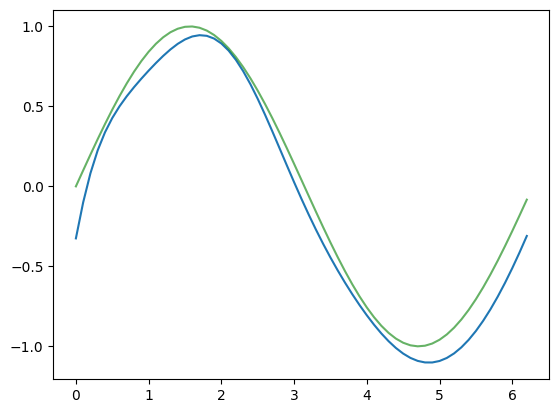

0.01567481372954247


In [ ]:
neurons = [12, 1]
activation_functions = ['sigmoid', 'linear']

model = Sequential()
model.add(Dense(neurons[0], input_dim=1, activation=activation_functions[0], kernel_initializer='random_uniform'))
model.add(Dense(neurons[1], activation=activation_functions[1], kernel_initializer='random_uniform'))

optim = RMSprop(learning_rate=0.01, rho=0.9, epsilon=1e-6)
model.compile(loss='mean_squared_error', optimizer=optim)

output_training = model.fit(x_train, y_train, epochs=3000, batch_size=6, verbose=0) # train the model
mse = output_training.history['loss'][-1] # from the 'history' of the error during training, take the last element (-1)
print('- mse is %.4f' % mse + ' @ ' + str(len(output_training.history['loss']))) # print the final MSE and at which episode it occured
y_pred = model.predict(x_test)
plt.figure()
plt.plot(x_test, y_pred) # plot the y-values predicted by the NN
plt.plot(x_sin, y_sin, color='green', alpha=0.6) # plot the sine-function
plt.show()
mse = mean_squared_error(y_test, y_pred)
print(mse)

If everything went well, you can see the result isn't really good, but still the sine-shape is clear.

Lets now train a more elaborate model on the same training set, and check it's performance on the same test-set. This time we will also perform a lot more episodes (training might take quite long). <br>
In the next cell, create a model with 2 hidden layers, both should have 30 neurons and the 'sigmoid' activation layer. Compile the model and use RMSprop (with the same parameter values, to have a fair comparison) again as the optimizer.

In [ ]:
neurons = [30, 1]
activation_functions = ['sigmoid', 'linear']

model = Sequential()
model.add(Dense(neurons[0], input_dim=1, activation=activation_functions[0], kernel_initializer='random_uniform'))
model.add(Dense(neurons[0], input_dim=1, activation=activation_functions[0], kernel_initializer='random_uniform'))
model.add(Dense(neurons[1], activation=activation_functions[1], kernel_initializer='random_uniform'))

optim = RMSprop(learning_rate=0.01, rho=0.9, epsilon=1e-6)
model.compile(loss='mean_squared_error', optimizer=optim)


We save the initial weights, such that we can start 

In [ ]:
ww = model.get_weights()

We train this model for a lot (7000-10000) episodes, with a batch_size of 1. After training, we plot the results on the test-set again. Compare this with the result of the smaller NN.

- mse is 0.0629 @ 8000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


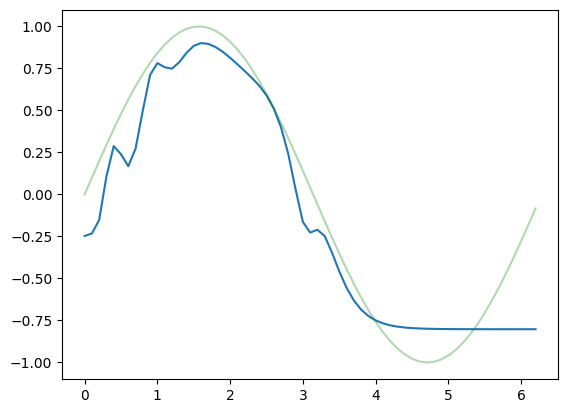

test-set mse0.04894878277784292


In [ ]:
output_training = model.fit(x_train, y_train, epochs=8000, batch_size=1, verbose=0, validation_data=(x_val,y_val)) # train the model
mse = output_training.history['loss'][-1] # from the 'history' of the error during training, take the last element (-1)
print('- mse is %.4f' % mse + ' @ ' + str(len(output_training.history['loss']))) # print the final MSE and at which episode it occured
y_pred = model.predict(x_test)
plt.figure()
plt.plot(x_test, y_pred) # plot the y-values predicted by the NN
plt.plot(x_sin, y_sin, color='green', alpha=0.3) # plot the sine-function
plt.show()
mse = mean_squared_error(y_test, y_pred)
print('test-set mse' + str(mse))

From this result it is clear the model is overfitting on the noise in the training data. We can visualize this result by plotting both the error on the training set and the validation set in function of the episodes performed. <br>
Remember that the validation set is not used during training itself. <br>
For visualization purposes we plot a running average of the error on both sets.

In [ ]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

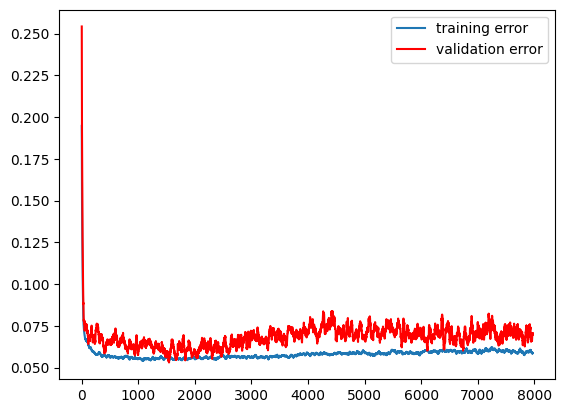

In [ ]:
mean_window=30
plt.figure()
train_loss = plt.plot(running_mean(x=output_training.history['loss'], N=mean_window), label='training error')
val_loss = plt.plot(running_mean(x=output_training.history['val_loss'], N=mean_window), color='red', label='validation error')
plt.legend()
plt.show()

In this figure you should see that, while the training set error keeps decreasing (why?), the validation-set error first decreases but starts increasing after a lot of episodes. This shows overfitting occurs. Make sure you understand why this is happening. <br>

You can find more info on overfitting and possible ways to avoid it here: https://nl.mathworks.com/help/nnet/ug/improve-neural-network-generalization-and-avoid-overfitting.html. <br>
Here, we will use Early Stopping. This is a quite simple way to avoid overfitting. It stops the training process when the validation-set error starts increasing (https://en.wikipedia.org/wiki/Early_stopping). <br>
Keras uses 'callbacks' which can be given as an argument in the fit() function. The documentation of the EarlyStopping callback in keras: https://keras.io/callbacks/#earlystopping.

Next, use the same elaborate model and train and evaluate it again on the same sets. Use again a lot of episodes, but make sure you append the early stopping callback to the fit() method. Choose a reasonable value for the 'patience' parameter (based on the previous result). Plot the result, and the errors in function of the episodes. Evaluate the differences between the previous result. Which of both results would you prefer in a real-life regression problem? Why? <br>
Initialize the model with the same weights it had initially (for the previous experiment) also don't forget to recompile.

In [2]:
from keras.callbacks import EarlyStopping
my_callbacks = [keras.callbacks.EarlyStopping(patience=2)]

In [3]:
output_training = model.fit(x_train, y_train, epochs=8000, batch_size=1, verbose=0, validation_data=(x_val,y_val), callbacks = my_callbacks) # train the model
mse = output_training.history['loss'][-1] # from the 'history' of the error during training, take the last element (-1)
print('- mse is %.4f' % mse + ' @ ' + str(len(output_training.history['loss']))) # print the final MSE and at which episode it occured
y_pred = model.predict(x_test)
plt.figure()
plt.plot(x_test, y_pred) # plot the y-values predicted by the NN
plt.plot(x_sin, y_sin, color='green', alpha=0.3) # plot the sine-function
plt.show()
mse = mean_squared_error(y_test, y_pred)
print('test-set mse' + str(mse))

NameError: name 'model' is not defined

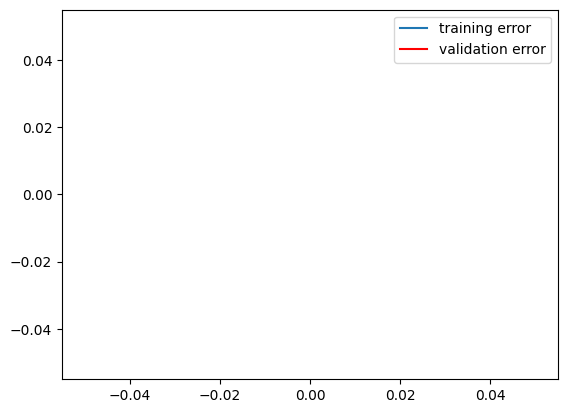

In [94]:
plt.figure()
plt.plot(running_mean(x=output_training.history['loss'], N=mean_window), label='training error')
plt.plot(running_mean(x=output_training.history['val_loss'], N=mean_window), color='red', label='validation error')
plt.legend()
plt.show()

Early stopping is one of the reasons why we can't use the validation set in our estimate of the final model's performance, because we have made important design decision based on the validation set. <br>
But remember that eventhough early stopping might avoid overfitting, we should still take into account Occams Razor. Large networks are computionally more expensive and thus we prefer to take the 'simplest' model which still works well for our problem. Unfotunately, there is no standard way to find out what this model is. You can find some guidelines in the earlier mentioned link: https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw. <br>
Furthermore, as mentioned earlier, we can use the validation set to tune the architecture of the model. Mostly, this is done through a search through the so-called hyperparameter space. Important hyperparameters include: amount of hidden layers, amount of neurons in each layer, activation function, ... . <br>
We can thus start from the mentioned guidelines and create a model for a couple of possible combinations of these hyperparameters. All these models can then be evaluated based on the validation set. Afterwards, we can choose the best performing model. The scikit-learn library of Python provides this functionality. Read more about it here: http://scikit-learn.org/stable/modules/grid_search.html. It is also possible to avoid the need of a validation set for this purpose. In cross-calidation the training set is split in N parts, N-1 parts are then used to train the model and 1 part is used as a validation set. This is then done several times, to get a more reliable estimate. More info on cross-validation: http://scikit-learn.org/stable/modules/cross_validation.html, https://stats.stackexchange.com/questions/301462/what-is-the-purpose-of-crossvalidation. <br>
Keras has a scikit learn API to be able to use your models within scikit-learn functions: https://keras.io/scikit-learn-api/.